# House Prices - Advanced Regression Techniques

## Lib's 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

#pd.set_option('display.max_rows', None)

# DATA

In [2]:
train_raw = pd.read_csv('/Users/daianeklein/Documents/Personal-Projects/House Prices - Advanced Regression Techniques/TT02/.house-prices-advanced-regression-techniques/train.csv')
test_raw = pd.read_csv('/Users/daianeklein/Documents/Personal-Projects/House Prices - Advanced Regression Techniques/TT02/.house-prices-advanced-regression-techniques/test.csv')

df = train_raw.copy()

### DATA TYPE

In [3]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
584,585,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,133000
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
423,424,60,RL,80.0,9200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,315000
407,408,70,RL,63.0,15576,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,177000
1175,1176,50,RL,85.0,10678,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,285000


In [4]:
# columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# data types
for f in df:
    a = abs(len(f) - 20)
    print(f + (" " * a)  + str(df[f].dtypes))

Id                  int64
MSSubClass          int64
MSZoning            object
LotFrontage         float64
LotArea             int64
Street              object
Alley               object
LotShape            object
LandContour         object
Utilities           object
LotConfig           object
LandSlope           object
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrType          object
MasVnrArea          float64
ExterQual           object
ExterCond           object
Foundation          object
BsmtQual            object
BsmtCond            object
BsmtExposure        object
BsmtFinType1        object
BsmtFinSF1          int64
BsmtFinType2        object
BsmtFinSF2          int64
BsmtUnfS

### DATA DIMENSIONS

In [7]:
print('Rows: {}\nColumns: {}'.format(df.shape[0], df.shape[1]))

Rows: 1460
Columns: 81


### NULL VALUES

In [8]:
df.isna().sum().sort_values(ascending = False)


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [9]:
# missing values
missing = df.isnull().sum()
aux = pd.DataFrame(missing[missing > 0].sort_values(ascending = False), columns = ['variables'])

# count + percentage
aux['percentage'] = aux['variables'].apply(lambda x : (x / (df.shape[0]) * 100))

aux

,variables,percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [10]:
# dropping missing values > 40%
df = df.drop(columns = aux[aux['percentage'] > 40].index)

# ffill missing values < 1%
df.loc[:, aux[aux['percentage'] < 1].index] = df.loc[:, aux[aux['percentage'] < 1].index].fillna(method = 'ffill')

aux2 = df.loc[:, aux[(aux['percentage'] > 1) & (aux['percentage'] < 18)].index]
aux2

for c in aux2.columns:
    df[c].fillna(df[c].mode()[0], inplace=True)

## DIMENSIONS ANALYSIS

In [11]:
# numerical attributes
num_attributes = df.select_dtypes(include=['int64', 'float64'])

# categorical attributes
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

In [12]:
cols = num_attributes.columns

def funcao_value_counts():
    for d in num_attributes[cols]:
        print((num_attributes[d].value_counts(normalize = True) * 100).sort_values(ascending = False).head(6))

funcao_value_counts()

1     0.068493
22    0.068493
4     0.068493
5     0.068493
6     0.068493
7     0.068493
Name: Id, dtype: float64
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
Name: MSSubClass, dtype: float64
60.0    27.534247
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
65.0     3.013699
Name: LotFrontage, dtype: float64
7200     1.712329
9600     1.643836
6000     1.164384
8400     0.958904
9000     0.958904
10800    0.958904
Name: LotArea, dtype: float64
5    27.191781
6    25.616438
7    21.849315
8    11.506849
4     7.945205
9     2.945205
Name: OverallQual, dtype: float64
5    56.232877
6    17.260274
7    14.041096
8     4.931507
4     3.904110
3     1.712329
Name: OverallCond, dtype: float64
2006    4.589041
2005    4.383562
2004    3.698630
2007    3.356164
2003    3.082192
1976    2.260274
Name: YearBuilt, dtype: float64
1950    12.191781
2006     6.643836
2007     5.205479
2005     5.000000
2004     4.24657

In [13]:
# drop numerical columns
df = df.drop(['MSSubClass', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath', 'LowQualFinSF', 
'BsmtFinSF2'], axis = 1)

In [14]:
cols = cat_attributes.columns

def funcao_value_counts():
    for d in cat_attributes[cols]:
        print((cat_attributes[d].value_counts(normalize = True) * 100).sort_values(ascending = False))
        
funcao_value_counts()

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      

In [15]:
# drop categorical columns
df = df.drop(['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical', 'CentralAir',
'Heating', 'BsmtFinType2', 'BsmtCond', 'RoofMatl', 'BldgType', 'Condition2', 'Condition1', 'LandSlope',
'Utilities', 'Street'], axis = 1)

## DESCRIPTIVE ANALYSIS

In [16]:
# numerical attributes
num_attributes = df.select_dtypes(include=['int64', 'float64'])

# categorical attributes
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

In [17]:
# Central Tendency - mean, median, mode
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
#ct3 = pd.DataFrame(num_attributes.apply(mode)).T

# Dipersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

# concat
t = pd.concat([ct1, ct2, d1, d2, d3, d4]).T.reset_index()
t.columns = ['attributes', 'mean', 'median', 'std', 'min', 'max', 'range']
t

,attributes,mean,median,std,min,max,range
0,Id,730.500000,730.5,421.465598,1.0,1460.0,1459.0
1,LotFrontage,68.267123,63.0,22.348697,21.0,313.0,292.0
2,LotArea,10516.828082,9478.5,9977.846105,1300.0,215245.0,213945.0
3,OverallQual,6.099315,6.0,1.382523,1.0,10.0,9.0
4,OverallCond,5.575342,5.0,1.112418,1.0,9.0,8.0
5,YearBuilt,1971.267808,1973.0,30.192559,1872.0,2010.0,138.0
6,YearRemodAdd,1984.865753,1994.0,20.638335,1950.0,2010.0,60.0
7,MasVnrArea,103.492466,0.0,180.733685,0.0,1600.0,1600.0
8,BsmtFinSF1,443.639726,383.5,455.941866,0.0,5644.0,5644.0
9,BsmtUnfSF,567.240411,477.5,441.715605,0.0,2336.0,2336.0


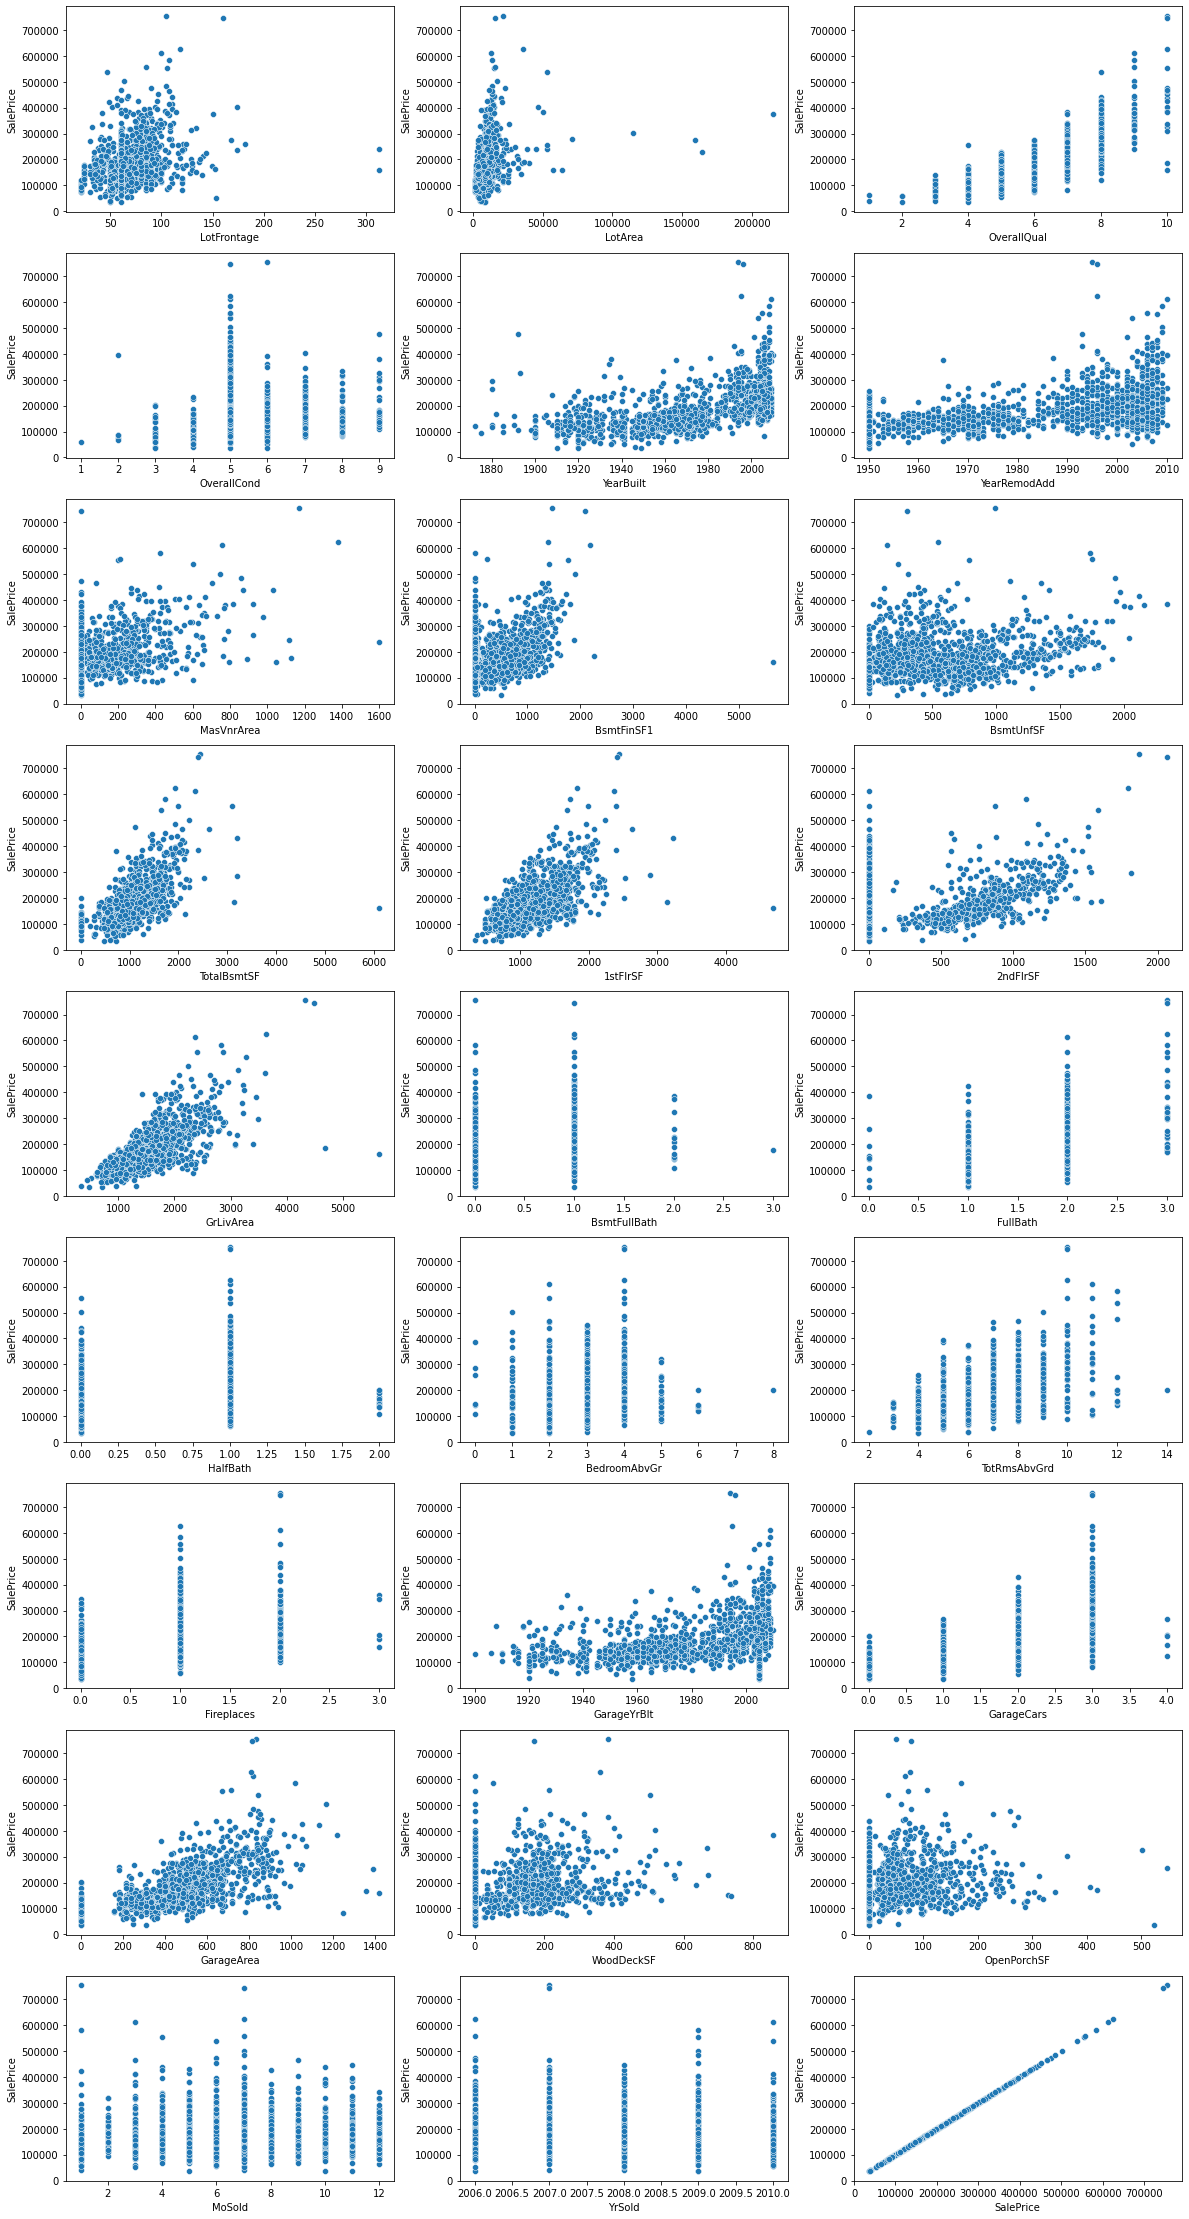

In [27]:
aux = num_attributes.drop(['Id'], axis = 1)

plt.figure(figsize = (20,40 ))
x = 1
for d in aux:
    plt.subplot(9, 3, x)
    sns.scatterplot(data = aux, x = d, y = 'SalePrice')
    x += 1
 